# Importing...

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [7]:
pokemon = pd.read_csv('../Dataset.csv', sep=',').dropna()
pokemon['Legendary'] = pokemon['Legendary'].astype(str)

# Training a decision tree to predict a pokemon's weight based on their characteristics...

Splitting the dataset and making a decision tree regressor...

In [8]:
pokemon_train, pokemon_test = train_test_split(pokemon, test_size=0.3, random_state=42, stratify=pokemon['Legendary'])
print(pokemon_train.shape, pokemon_test.shape)

(383, 44) (165, 44)


In [14]:
features= ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']
dt_regression = DecisionTreeRegressor(max_depth = 3)
dt_regression.fit(pokemon_train[features], pokemon_train['Weight'])

DecisionTreeRegressor(max_depth=1)

In [15]:
predictionsOnTrainset = dt_regression.predict(pokemon_train[features])
predictionsOnTestset = dt_regression.predict(pokemon_test[features])

In [16]:
rmseTrain = calculate_rmse(predictionsOnTrainset, pokemon_train.Weight)
rmseTest = calculate_rmse(predictionsOnTestset, pokemon_test.Weight)

print("RMSE on training set " + str(rmseTrain))
print("Normalised RMSE on training set " + str(rmseTrain / (pokemon_train.Weight.max() - pokemon_train.Weight.min())))
print("RMSE on test set " + str(rmseTest))
print("Normalised RMSE on test set " + str(rmseTest / (pokemon_test.Weight.max() - pokemon_test.Weight.min())))

RMSE on training set 134.0870187335839
Normalised RMSE on training set 0.1341138415018843
RMSE on test set 132.44992965559499
Normalised RMSE on test set 0.149188927298485


I expected the training set to be a lot more accurate, since there's so much more data in it. This is true, as it is much closer to 0 than the test set.

## Making a plottree...

In [17]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

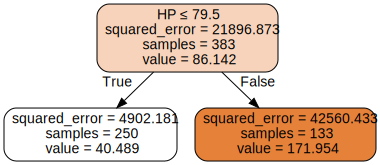

In [18]:
plot_tree_regression(dt_regression, features)